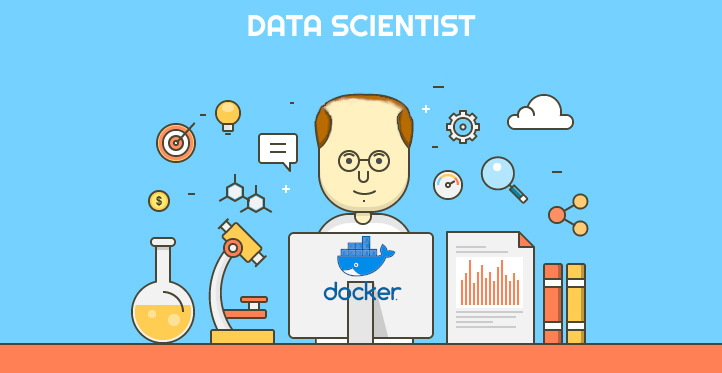

# Modelo K-Means
Algorítimo não supervisionado destinado a Clusterização

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

%matplotlib inline

In [12]:
df = pd.read_csv('bases/gameML.csv', delimiter=';')
df.head()

,Nome,Idade,Salário
0,Daenerys Targaryen,27,70000
1,Jon Snow,29,90000
2,Gregor Ciegane,29,61000
3,Arya Stark,28,60000
4,Tyrion Lannister,42,130000


## Técnica do Cotovelo (Elbow Technique)
Usada para achar o número ideal de k (clusters)
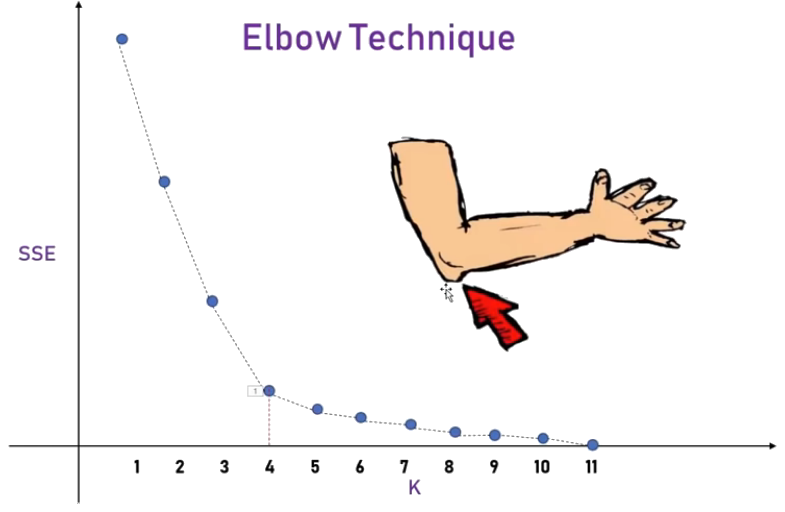

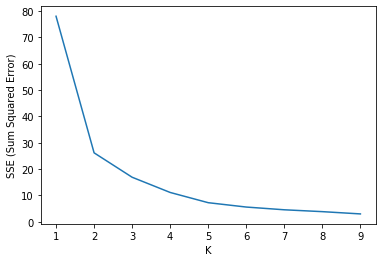

In [10]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Idade','Salário']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('SSE (Sum Squared Error)')
plt.plot(k_rng, sse)

In [ ]:
plt.scatter(df['Idade'], df['Salário'])

## A. Treinar o modelo

In [19]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Idade','Salário']])
df['ypred'] = y_predict
df.head()

,Nome,Idade,Salário,ypred
0,Daenerys Targaryen,27,70000,0
1,Jon Snow,29,90000,1
2,Gregor Ciegane,29,61000,0
3,Arya Stark,28,60000,0
4,Tyrion Lannister,42,130000,1


## B. Plotar o Gráfico

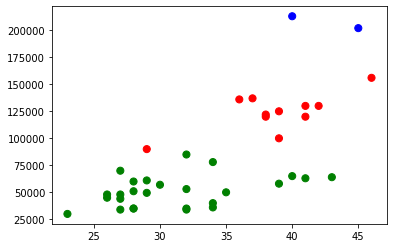

In [20]:
cores = np.array(['green', 'red', 'blue', 'yellow', 'black'])
plt.scatter(x=df['Idade'], 
            y=df['Salário'], 
            c=cores[df.ypred], s=50)

## C. Colocar em Escala

In [5]:
df_scale = df
df_scale['Salário'] = scale(df_scale.Salário)
df_scale['Idade'] = scale(df_scale.Idade)
df_scale.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,Nome,Idade,Salário,ypred
0,Daenerys Targaryen,-1.132915,-0.209416,0
1,Jon Snow,-0.804412,0.221004,1
2,Gregor Ciegane,-0.804412,-0.403105,0
3,Arya Stark,-0.968664,-0.424626,0
4,Tyrion Lannister,1.330860,1.081844,1


#### Repetir os passos A e B

In [8]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df_scale[['Idade','Salário']])
df_scale['ypred'] = y_predict
df_scale.head()

,Nome,Idade,Salário,ypred
0,Daenerys Targaryen,-1.132915,-0.209416,0
1,Jon Snow,-0.804412,0.221004,0
2,Gregor Ciegane,-0.804412,-0.403105,0
3,Arya Stark,-0.968664,-0.424626,0
4,Tyrion Lannister,1.330860,1.081844,2


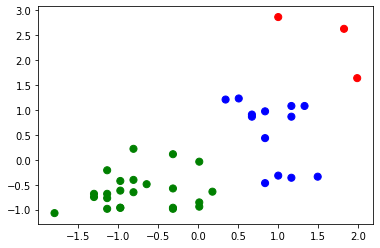

In [9]:
cores = np.array(['green', 'red', 'blue'])
plt.scatter(x=df_scale['Idade'], 
            y=df_scale['Salário'], 
            c=cores[df_scale.ypred], s=50)

Até a próxima \
Fernando Anselmo